<a href="https://colab.research.google.com/github/Hidrovales/Balanco_Hidrico/blob/main/Ajustes_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ajuste dos dados para cálculo da Evapotranspiração de Referência com FAO 56


<img src="https://github.com/Hidrovales/Balanco_Hidrico/blob/main/Figuras/salinas_vertical_jpg.jpg?raw=true" width="100"/>



[HIDROVALES - GRUPO DE PESQUISA EM RECURSOS HÍDRICOS E AMBIENTAIS DO NORTE DE MINAS GERAIS](http://www.hidrovales.com.br/)

Patrícia O. Lucas, Marcelo R. Vicente e Ronaldo M. Santos



###Pacotes

In [ ]:
!git clone https://github.com/Hidrovales/Balanco_Hidrico.git

Cloning into 'Balanco_Hidrico'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 40 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (40/40), done.


In [ ]:
import pandas as pd
from google.colab import files
from Balanco_Hidrico import Ajuste

###Upload da base de dados bruta

In [ ]:
dataset =  pd.read_csv('/content/drive/MyDrive/Hidrovales/PROJETO_BALANCO_HIDRICO/dataset_brutos/RIO_PARDO_MINAS.csv',delimiter=';' )
dataset = dataset.drop(["Unnamed: 11"],axis=1) #-------------------> Exclusão de colunas
dataset.head(3)

,DATA,PRECIPITACAO_TOTAL,PRESSAO_ATMOSFERICA,TEMPERATURA_PONTO_ORVALHO,TEMPERATURA_MAXIMA,TEMPERATURA_MEDIA,TEMPERATURA_MINIMA,UMIDADE_RELATIVA,UMIDADE_RELATIVA.1,VENTO,VELOCIDADE_VENTO
0,2018-01-01,0.0,918.520833,18.929167,31.4,23.829167,19.1,75.958333,43.0,10.8,1.5375
1,2018-01-02,0.4,916.429167,18.412500,32.4,22.854167,18.8,79.041667,35.0,17.8,1.7625
2,2018-01-03,4.6,916.487500,19.666667,30.8,21.900000,20.1,88.208333,47.0,12.2,1.2625


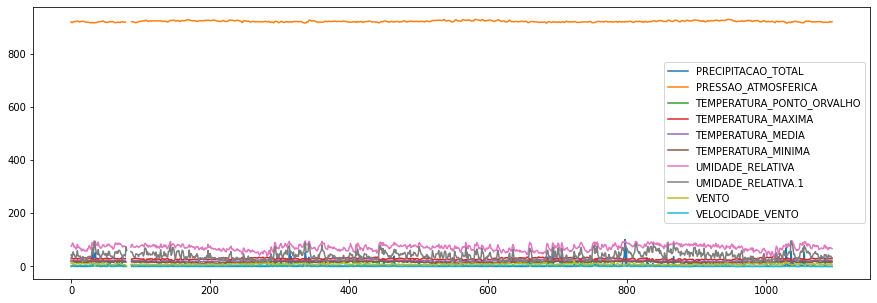

In [ ]:
dataset.head()
dataset.plot(figsize=(15,5))

###Ajuste para calculo da $ET_o$:

In [ ]:
#Conversão da velocidade do vento
dataset['VELOCIDADE_VENTO'] = Ajuste.conversao_U2(dataset['VELOCIDADE_VENTO'])

In [ ]:
#Completa dados faltantes de Velocidade do vento
dataset['VELOCIDADE_VENTO'] = Ajuste.completa_U2(dataset['VELOCIDADE_VENTO'])

In [ ]:
#Interpolação para completar dados faltantes de Temperaturas máxima e mínima
dataset['TEMPERATURA_MAXIMA'], dataset['TEMPERATURA_MINIMA'], dataset['TEMPERATURA_MEDIA'] = Ajuste.interpola_Temperatura(dataset['TEMPERATURA_MAXIMA'], dataset['TEMPERATURA_MINIMA'], dataset['TEMPERATURA_MEDIA'])

In [ ]:
#Calcula dia do ano e inserir em dataset
dataset = Ajuste.calcula_dia(dataset)

###Salvando a base de dados ajustada

In [ ]:
dataset.to_csv('RIO_PARDO_MINAS_AJUSTADO.csv',index=True)